# Titanic
- Criando modelo para prever sobreviventes do acidente do navio
- Base de dados: https://www.kaggle.com/competitions/titanic/data

In [79]:
import pandas as pd
base = pd.read_csv("train.csv")
base.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [80]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [81]:
base.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
base.shape

(891, 12)

In [83]:
base.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [84]:
base.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [85]:
base.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Tratando valores nulos

In [86]:
# transformando os valores nulos da "age" na média da coluna
base["Age"] = base['Age'].fillna(base['Age'].median())

In [87]:
base.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

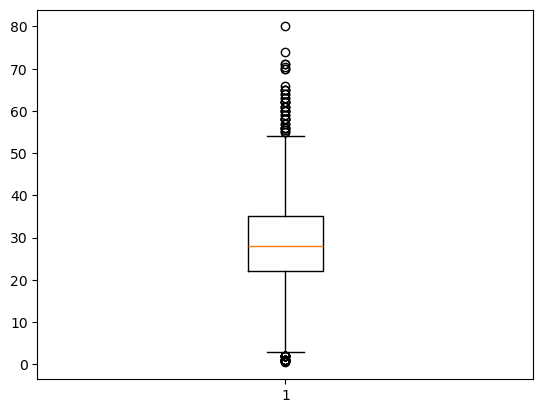

In [88]:
# analisando as idades
import matplotlib.pyplot as plt

fig, ax  = plt.subplots()

ax.boxplot(base["Age"])

plt.show()

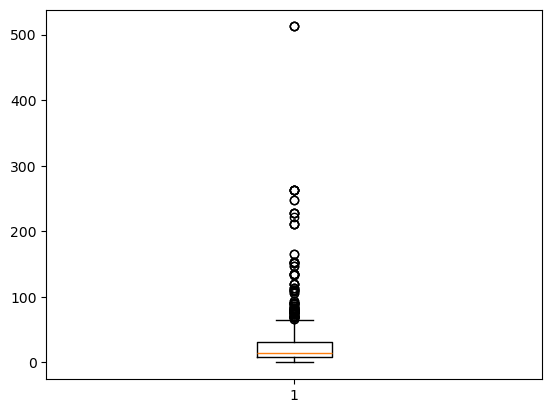

In [89]:
# Analisando as passagems
# Veja que tem uma passagem muito mais cara, isso pode ter sido algum erro ou talvez realmente exista um local especial de luxo
import matplotlib.pyplot as plt

fig, ax  = plt.subplots()

ax.boxplot(base["Fare"])

plt.show()

#### tratando a coluna "cabin" 
- Vamos simplificar ela criando uma nova coluna "deck" só com a primeira letra do código
- Colocar os valores nulos como "unknow"

In [41]:
base["Cabin"].nunique()

147

In [42]:
base[base["Cabin"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S


In [43]:
base['Deck'] = base['Cabin'].str[0]

In [44]:
base.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN


In [45]:
# trocando os valores nulos
base['Deck'] = base["Deck"].fillna("Unknown")

In [46]:
base['Cabin'] = base["Cabin"].fillna("Unknown")

In [47]:
base.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Deck           0
dtype: int64

In [48]:
base.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Unknown


In [49]:
base.groupby("Deck")[["Fare"]].sum().sort_values("Fare", ascending=False)

,Fare
Deck,
Unknown,13161.0825
C,5908.9291
B,5334.7709
D,1889.0710
E,1472.8542
A,594.3583
F,243.0583
G,54.3250
T,35.5000


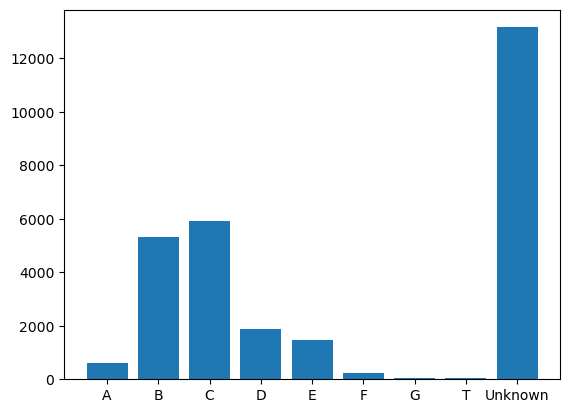

In [50]:
# tivemos mais faturamento nas alas B e C
import matplotlib.pyplot as plt

fig, ax  = plt.subplots()
x = base.groupby("Deck")[["Fare"]].sum()["Fare"].index 
y = base.groupby("Deck")[["Fare"]].sum()["Fare"].values

ax.bar(x,y)

plt.show()

In [51]:
#Vendo a média de cada deck dos valores
base_fare_mean = base.groupby("Deck")[["Fare"]].mean().sort_values("Fare", ascending=False)
base_fare_mean 

,Fare
Deck,
B,113.505764
C,100.151341
D,57.244576
E,46.026694
A,39.623887
T,35.500000
Unknown,19.157325
F,18.696792
G,13.581250


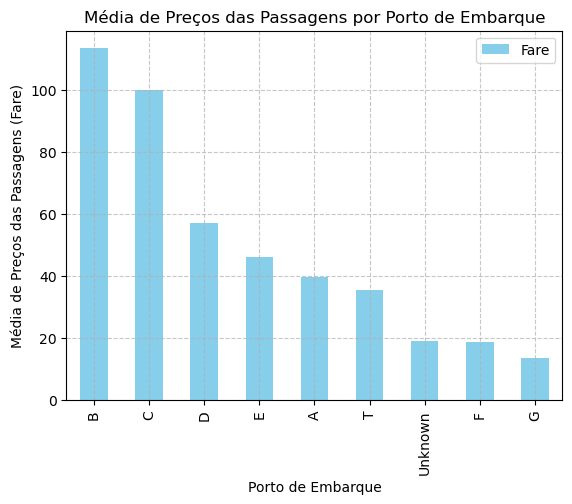

In [52]:
# Criar o gráfico de barras
fig, ax = plt.subplots()
base_fare_mean.plot(kind='bar', ax=ax, color=['skyblue', 'lightgreen', 'salmon'])

# Adicionar títulos e rótulos
ax.set_title('Média de Preços das Passagens por Porto de Embarque')
ax.set_xlabel('Porto de Embarque')
ax.set_ylabel('Média de Preços das Passagens (Fare)')
ax.grid(True, linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()


In [53]:
base.sort_values("Fare", ascending = False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,Unknown,C,Unknown
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,B
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,B
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,28.0,0,0,112052,0.0000,Unknown,S,Unknown
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,28.0,0,0,239853,0.0000,Unknown,S,Unknown
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,Unknown,S,Unknown
732,733,0,2,"Knight, Mr. Robert J",male,28.0,0,0,239855,0.0000,Unknown,S,Unknown


In [54]:
# Vendo valores nulos do embarked
base[base["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B


In [55]:
# como só tem 2 valores podemos excluir eles pois possivelmente foi algum erro
base = base.dropna(subset=['Embarked'])

In [56]:
# Pronto tudo limpo
base.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Deck           0
dtype: int64

In [57]:
base.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Unknown


## Tratando valores unknown

In [58]:
# Temos 687 linhas que precisamos tratar
len(base[base["Deck"] == "Unknown"])

687

In [59]:
base["Deck"].unique()

array(['Unknown', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [60]:
base2 = base

In [61]:
base = base2

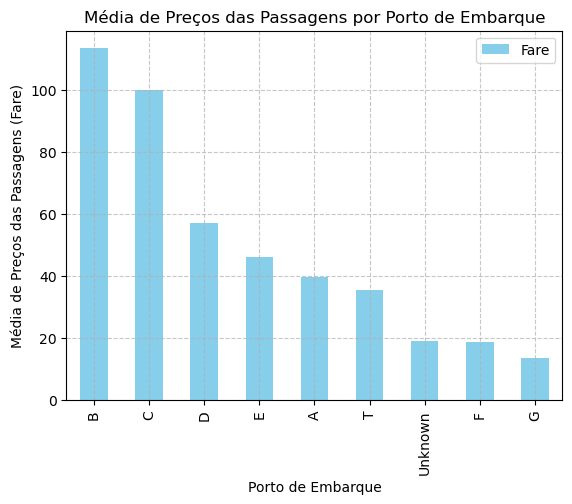

In [62]:
# Criar o gráfico de barras
fig, ax = plt.subplots()
base_fare_mean.plot(kind='bar', ax=ax, color=['skyblue', 'lightgreen', 'salmon'])

# Adicionar títulos e rótulos
ax.set_title('Média de Preços das Passagens por Porto de Embarque')
ax.set_xlabel('Porto de Embarque')
ax.set_ylabel('Média de Preços das Passagens (Fare)')
ax.grid(True, linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()


In [63]:
# vamos tratar obviamente só a coluna "deck" pois é nela que vamos fazer a analise e na "cabin" que vamos remove-la depois
len(base[base["Deck"] == 'Unknown']) # muitos valores

687

### Perceba que usamos uma tupla "()" nas expressões do dissionário como -> "'B': (100, float('inf'))," pois são mais rápidas que os "[]" (listas).... mas poderia ter usado "[]" se quisesse

In [64]:
# Codigo para estipular os valores desconhecidos

deck_mapping = {
    'B': (100, float('inf')), 
    'C': (60, 100),  
    'D': (50, 60), 
    'E': (40, 50),
    'A': (35, 40),
    'T': (30, 35),
    'F': (20, 30),
    'G': (1, 20),
}

# Função para atribuir deck com base no valor da passagem, apenas se o valor atual for 'unknown'
def assign_deck(row):
    if row['Deck'] == 'Unknown':  # Verifique se 'Deck' é 'unknown'
        for deck, fare_range in deck_mapping.items():
            if (fare_range[0] <= row['Fare']) & (row['Fare'] <= fare_range[1]):  # Verificar se o 'Fare' está dentro do intervalo
                return deck
    return row['Deck']


In [65]:
base["Deck"] = base.apply(assign_deck, axis=1)

In [66]:
base.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,G
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,G
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,G


In [67]:
len(base[base["Deck"] == 'Unknown']) # Só sobraram 12 valores aonde o valor da passagem é 0... podemos exlcuir eles

12

In [68]:
len(base)

889

In [69]:
# Removendo as linhas desnecessárias
base = base[base["Deck"] != 'Unknown']

In [70]:
# eliminamos as 12 linhas
len(base)

877

In [71]:
len(base[base["Deck"] == 'Unknown']) # valores desconhecidos

0

In [72]:
base.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,G
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,G
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,G


In [78]:
base[["Name", "Deck"]]

,Name,Deck
0,"Braund, Mr. Owen Harris",G
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C
2,"Heikkinen, Miss. Laina",G
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",C
4,"Allen, Mr. William Henry",G
...,...,...
886,"Montvila, Rev. Juozas",G
887,"Graham, Miss. Margaret Edith",B
888,"Johnston, Miss. Catherine Helen ""Carrie""",F
889,"Behr, Mr. Karl Howell",C


### Exportando o arquivo já tratado

In [73]:
# base.to_csv('titanic_1.csv', index=False)